# Feature classifier - Gabbar

## Step 1. Prepare problem

#### 1a. Load libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

In [3]:
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

#### 1b. Load dataset

In [4]:
# Loading the training dataset.
attributes = pd.read_csv('../downloads/feature-classifier/training/attributes.csv')

In [5]:
# Drop all duplicate attributes.
print('Shape before dropping duplicates: {}'.format(attributes.shape))
attributes = attributes.drop_duplicates(subset='changeset_id')
print('Shape after dropping duplicates: {}'.format(attributes.shape))

Shape before dropping duplicates: (5470, 75)
Shape after dropping duplicates: (5470, 75)


In [6]:
# Creating a smaller sample to speed up workflow.
# attributes = attributes[:500]

In [7]:
attributes.head(10)

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_old_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway
0,48269805,0,0,1,0,0,0,0,0,10504,0,0,0,1,1,1,0,0,0,0,2145,9123,213,15,7,7,0,95,2,9350,9350,4,2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48269170,1,0,1,0,1,0,1,0,0,0,0,0,2405,125105,400,0,0,0,0,2405,125105,400,0,0,3,0,934,2,0,0,10,7,0,0,0,1,6,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,48267592,1,0,1,0,1,0,4,0,628386,0,0,0,11,48,2,0,0,0,0,4364,1115802,1783,16,30,3,0,743,1,853363,853363,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48266008,0,0,1,0,1,0,2,0,2217,0,0,0,20,163,2,0,1,0,0,662,45987,90,0,0,2,0,2147,2,754,754,4,1,0,0,0,4,0,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,48265965,0,0,1,0,1,0,2,0,0,0,0,0,100,1599,5,0,1,0,0,4393,332332,517,1145,28,37,0,39,1,0,0,12,8,0,1,1,0,3,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,48264238,0,0,1,0,1,0,5,0,0,0,0,1,43032,2458846,992,8,20,0,0,5,18,3,0,0,8,0,149,1,0,0,8,5,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,48260457,1,0,1,0,1,0,3,0,8602,0,0,0,2,15,1,0,0,0,0,2,15,1,0,0,2,0,0,1,16918,16918,6,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,48256321,0,0,1,0,1,0,12,0,4281722,0,0,0,1174,320767,118,2,4,0,0,1174,320767,118,2,4,2,0,0,1,0,0,2,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,48255884,1,0,1,0,1,0,4,0,72287,0,0,0,59,1021,13,0,0,0,0,59,1021,13,0,0,2,0,0,2,0,0,4,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,48255854,1,0,1,0,1,0,4,0,173848,0,0,0,59,1021,13,0,0,0,0,59,1021,13,0,0,2,0,0,2,0,0,4,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Summarize data

#### 2a. Descriptive statistics

In [8]:
print('Shape: {}'.format(attributes.shape))

Shape: (5470, 75)


In [9]:
attributes.dtypes.head(10)

changeset_id                             int64
changeset_harmful                        int64
changeset_features_created               int64
changeset_features_modified              int64
changeset_features_deleted               int64
changeset_has_imagery_used               int64
changeset_has_source                     int64
changeset_comment_number_of_words        int64
changeset_comment_naughty_words_count    int64
changeset_bbox_area                      int64
dtype: object

In [10]:
attributes.describe()

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_old_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway
count,5.47e+03,5470.00,5470.0,5470.0,5470.0,5470.00,5470.00,5470.00,5.47e+03,5.47e+03,5.47e+03,5.47e+03,5470.00,5470.00,5.47e+03,5470.00,5470.00,5470.00,5.47e+03,5470.00,5470.00,5.47e+03,5470.00,5470.00,5470.00,5470.00,5.47e+03,5470.00,5470.00,5.47e+03,5.47e+03,5470.00,5470.00,5470.00,5470.00,5470.00,5470.00,5470.00,5470.00,5470.00,5470.00,5470.00,5470.00,5470.00,5470.0,5.47e+03,5.47e+03,5.47e+03,5470.0,5470.0,5.47e+03,5470.00,5.47e+03,5.47e+03,5470.00,5.47e+03,5.47e+03,5470.0,5470.00,5470.00,5470.00,5470.00,5.47e+03,5.47e+03,5470.00,5.47e+03,5470.00,5.47e+03,5.47e+03,5470.00,5470.00,5470.00,5470.00,5470.00,5.47e+03
mean,4.73e+07,0.08,0.0,1.0,0.0,0.48,0.37,4.26,1.10e-03,1.37e+10,9.14e-04,1.83e-04,0.36,5060.42,2.61e+05,263.64,24.18,105.08,1.65e-03,0.43,6746.59,1.46e+06,556.26,50.32,20.85,6.20,3.66e-03,637.13,1.11,1.53e+10,1.51e+10,6.47,1.52,0.11,0.06,0.08,1.31,0.35,0.20,1.86,0.47,0.13,0.09,0.02,0.0,5.48e-03,2.56e-03,1.83e-04,0.0,0.0,1.46e-03,0.15,7.13e-03,9.69e-03,0.17,1.65e-03,1.65e-03,0.0,0.39,0.01,0.03,0.08,4.57e-03,7.31e-04,0.03,9.32e-03,0.05,1.10e-03,8.59e-03,0.01,0.01,0.08,0.02,0.04,3.84e-03
std,6.23e+05,0.27,0.0,0.0,0.0,0.50,0.48,5.10,3.31e-02,5.51e+11,3.02e-02,1.35e-02,0.95,17547.42,1.08e+06,493.55,173.56,531.48,4.05e-02,1.04,20283.55,8.56e+06,657.03,368.00,201.71,16.59,6.33e-02,750.33,0.45,7.17e+11,7.17e+11,7.15,5.70,0.31,0.23,0.27,1.85,0.95,0.82,2.21,0.50,0.33,0.28,0.15,0.0,7.39e-02,5.05e-02,1.35e-02,0.0,0.0,3.82e-02,0.36,8.41e-02,9.80e-02,0.38,4.05e-02,4.05e-02,0.0,0.49,0.11,0.17,0.27,6.75e-02,2.70e-02,0.17,9.61e-02,0.21,3.31e-02,9.23e-02,0.10,0.11,0.26,0.14,0.19,6.18e-02
min,4.48e+07,0.00,0.0,1.0,0.0,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00,0.00,2.00,0.00e+00,-1645.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.0,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00e+00
25%,4.71e+07,0.00,0.0,1.0,0.0,0.00,0.00,3.00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,15.00,3.70e+01,3.00,0.00,0.00,0.00e+00,0.00,289.50,1.02e+04,47.00,0.00,0.00,2.00,0.00e+00,36.00,1.00,0.00e+00,0.00e+00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00e+00,0.0,0.00,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00e+00
50%,4.74e+07,0.00,0.0,1.0,0.0,0.00,0.00,3.00,0.00e+00,1.06e+03,0.00e+00,0.00e+00,0.00,221.00,1.45e+03,26.

In [11]:
attributes.groupby('changeset_harmful').size()

changeset_harmful
0    5031
1     439
dtype: int64

In [12]:
attributes.corr(method='pearson').head(10)

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_old_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway
changeset_id,1.00e+00,-4.36e-01,NaN,NaN,NaN,-1.71e-01,0.16,1.04e-01,1.42e-02,8.92e-04,-4.06e-03,-9.39e-03,4.54e-02,-2.39e-02,2.18e-02,-1.83e-03,-2.07e-02,-7.45e-01,1.87e-02,4.56e-02,2.96e-02,2.98e-02,5.43e-02,-3.79e-03,-2.66e-01,-1.75e-02,3.21e-02,-7.63e-03,1.74e-02,-2.04e-03,-2.24e-03,5.32e-02,7.39e-04,-3.77e-03,4.56e-02,0.02,2.55e-02,2.31e-02,3.67e-02,4.49e-02,-1.68e-01,-2.09e-02,4.70e-02,7.80e-03,NaN,-2.28e-02,2.90e-03,-1.07e-02,NaN,NaN,5.01e-03,-2.57e-03,6.08e-03,-8.68e-03,0.05,-2.17e-03,9.15e-03,NaN,-0.14,2.81e-03,4.61e-02,9.50e-02,-1.16e-02,3.20e-03,-9.02e-04,3.88e-03,8.54e-02,2.26e-04,-1.23e-02,-2.81e-03,-1.88e-02,2.96e-02,3.61e-03,6.36e-04,2.38e-04
changeset_harmful,-4.36e-01,1.00e+00,NaN,NaN,NaN,2.51e-01,-0.22,-2.48e-02,1.05e-02,-7.34e-03,1.33e-02,-3.99e-03,-4.89e-02,-5.45e-02,-6.12e-02,-1.37e-01,-3.60e-02,6.37e-01,4.61e-03,-4.08e-02,-1.94e-02,-2.47e-02,-1.01e-01,-3.58e-03,2.31e-01,-4.92e-03,5.73e-02,-2.05e-02,2.00e-02,3.24e-02,3.25e-02,-3.05e-02,4.59e-02,-3.65e-02,-3.03e-02,-0.04,-1.81e-02,2.78e-02,5.79e-02,1.82e-02,2.54e-01,-1.02e-01,-2.90e-02,-3.35e-02,NaN,-2.19e-02,-1.50e-02,-3.99e-03,NaN,NaN,6.30e-03,-6.79e-02,-9.04e-03,-1.74e-03,-0.02,-1.20e-02,4.61e-03,NaN,0.05,-2.56e-02,7.60e-02,1.12e-01,-2.00e-02,-7.99e-03,4.86e-02,-7.65e-03,-2.92e-03,-9.79e-03,-5.63e-03,-2.30e-02,-3.36e-02,-4.85e-02,-7.71e-03,-2.29e-02,3.42e-03
changeset_features_created,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
changeset_features_modified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
changeset_features_deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
changeset_has_imagery_used,-1.71e-01,2.51e-01,NaN,NaN,NaN,1.00e+00,-0.71,1.12e-01,1.25e-02,1.46e-04,7.39e-03,-1.29e-02,1.23e-01,-1.76e-01,-1.36e-01,-2.44e-01,-1.00e-01,1.94e-01,6.31e-03,2.55e-02,-1.83e-02,6.61e-03,-1.40e-01,-4.83e-03,7.11e-02,-4.05e-02,2.57e-02,-3.20e-02,9.95e-02,1.78e-02,1.81e-02,2.39e-02,1.42e-02,9.36e-02,2.51e-0

In [13]:
skew = attributes.skew()
skew.sort(ascending=False)
skew.head(10)

Merkaartor                               73.96
user_name_naughty_words_count            73.96
changeset_bbox_area                      55.53
feature_old_area                         52.82
feature_area                             52.78
military                                 36.95
changeset_non_open_data_source           33.04
feature_tags_modified_count              30.66
power                                    30.15
changeset_comment_naughty_words_count    30.15
dtype: float64

#### 2b. Data visualizations

In [14]:
# Histograms.
# attributes.hist(figsize=(20, 20));

In [15]:
# Density plot.
# attributes.plot.density(figsize=(20, 50), subplots=True, sharex=False);

In [16]:
# attributes.plot.box(layout=(5, 4), figsize=(20, 25), subplots=True, sharex=False, sharey=False);

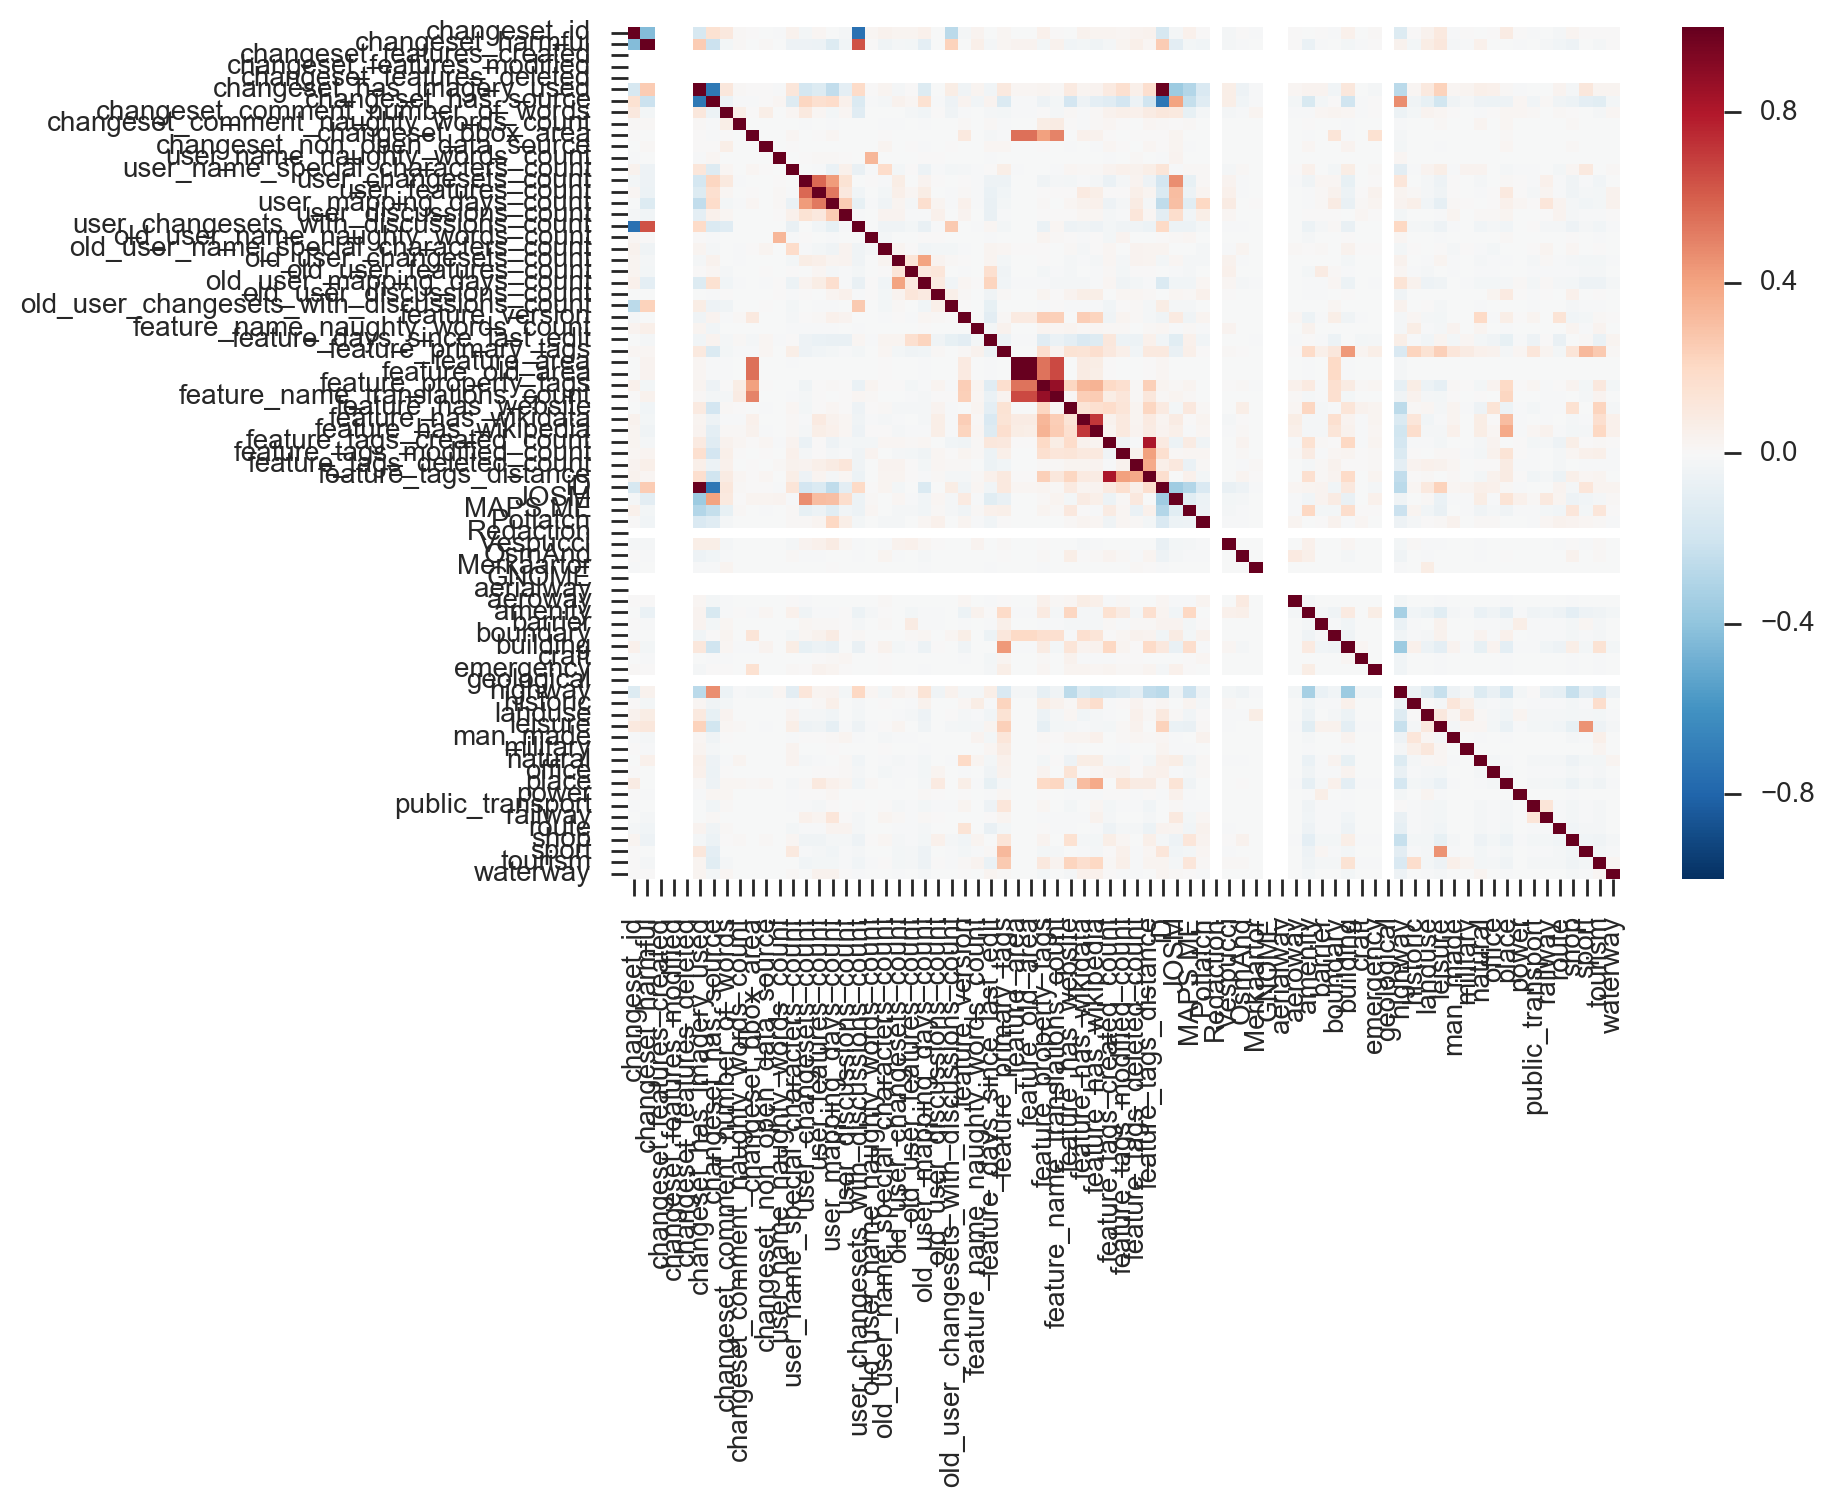

In [17]:
sns.heatmap(attributes.corr(method='pearson'));

## 3. Prepare data

#### 3a. Data cleaning

#### 3b. Feature selection

In [18]:
non_training_attributes = ['changeset_id', 'changeset_harmful']
X = attributes.drop(non_training_attributes, axis=1)
y = attributes['changeset_harmful']

#### 3c. Data transforms

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)

In [20]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled, y, random_state=42, train_size=0.9)

/Users/bkowshik/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# Estimate importance of all features.
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

importances = pd.DataFrame(
    list(zip(X.columns, model.feature_importances_)),
    columns=['feature', 'importance']
)
importances.sort(columns='importance', ascending=False).head(10)

,feature,importance
15,user_changesets_with_discussions_count,0.31
22,old_user_changesets_with_discussions_count,0.04
11,user_changesets_count,0.04
5,changeset_comment_number_of_words,0.03
3,changeset_has_imagery_used,0.03
25,feature_days_since_last_edit,0.03
27,feature_area,0.02
34,feature_tags_created_count,0.02
19,old_user_features_count,0.02
13,user_mapping_days_count,0.02


## 4. Evaluate algorithms

#### 4a. Split-out validation dataset
- We have a seperate validation dataset. Yay!

#### 4b. Spot Check Algorithms
- Running algorithms in a loop below.

#### 4c. Compare Algorithms

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))

results = []
names = []
for (name, model) in models:
    kfold = KFold(n_splits=10, random_state=7)
    result = cross_val_score(model, Xscaled, y, cv=kfold, scoring='roc_auc')
    results.append(result)
    names.append(name)
    
    print('{}: {} ({})'.format(name, round(result.mean(), 2), round(result.std(), 2)))

LR: 0.81 (0.07)
CART: 0.56 (0.05)
KNN: 0.63 (0.1)
SVM: 0.74 (0.13)
RFC: 0.78 (0.06)
GBC: 0.86 (0.06)


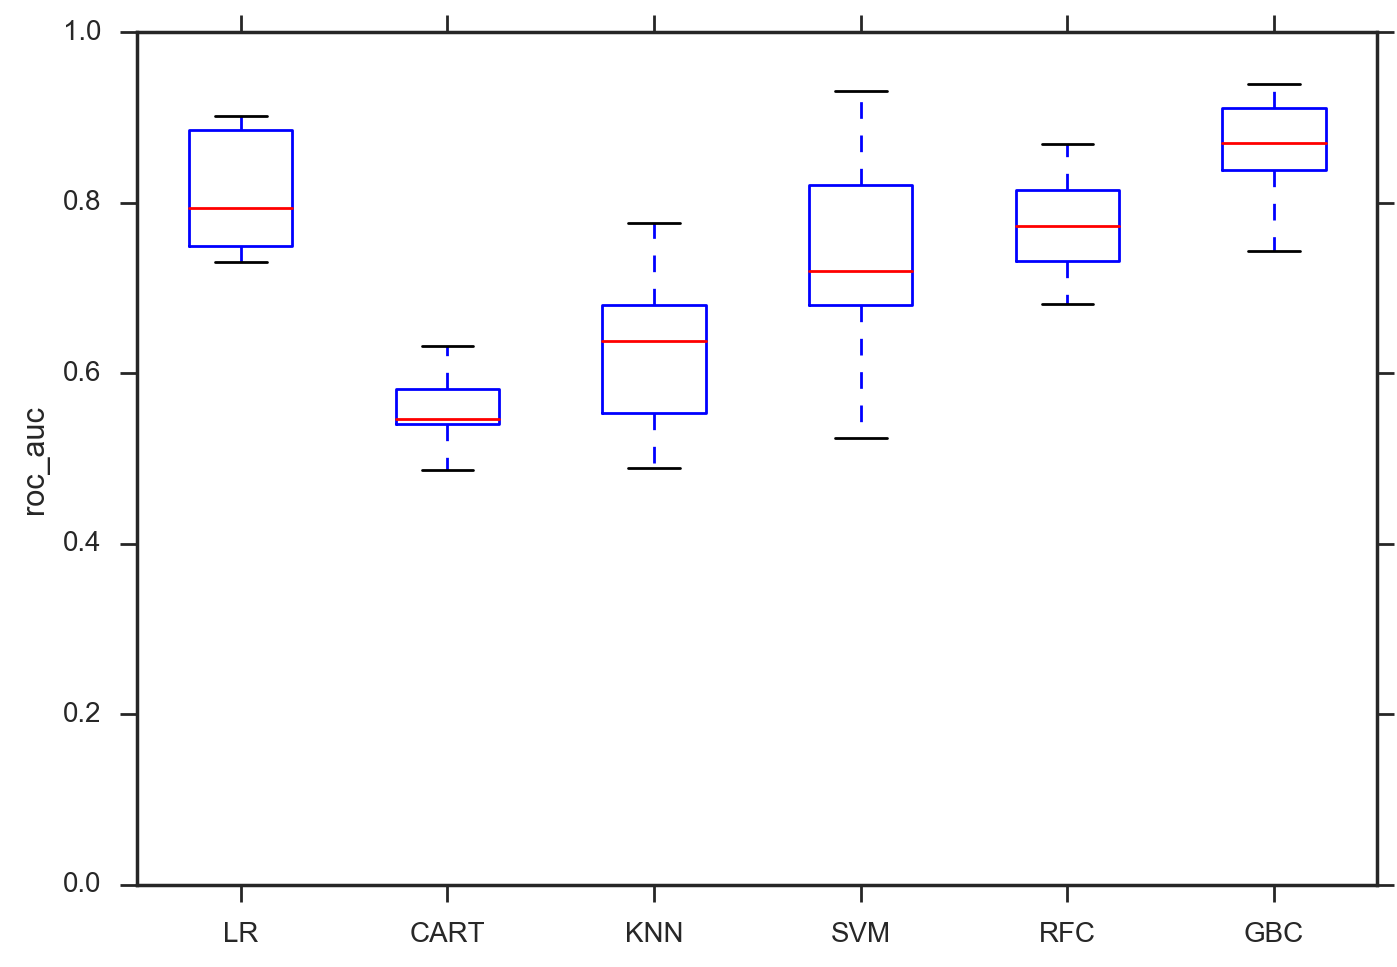

In [23]:
fig, ax = plt.subplots(1, 1)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('roc_auc')
ax.set_ylim((0, 1));

## 5. Improve Accuracy

#### 5a. Algorithm Tuning

In [24]:
harmful_count = attributes[attributes['changeset_harmful'] == True].shape[0]
not_harmful_count = attributes[attributes['changeset_harmful'] == False].shape[0]

# Making this a float to prevent truncation due to integer division.
count = 1.0 * (harmful_count + not_harmful_count)

# Calculate sample weights based on number of occourances.
sample_weight = [(not_harmful_count / count) if l else (harmful_count / count) for l in ytrain]

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [1, 10, 100],
    'max_depth': [1, 10, 100],
    'learning_rate': [0.1, 1, 10],
    'max_features': ['log2']
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, fit_params={'sample_weight': sample_weight})
grid.fit(Xtrain, ytrain)

print('Best score: {}'.format(grid.best_score_))
print('Best params: {}'.format(grid.best_params_))

Best score: 0.9581555961811903
Best params: {'max_depth': 100, 'n_estimators': 100, 'max_features': 'log2', 'learning_rate': 0.1}


In [26]:
model = grid.best_estimator_
ymodel = model.predict(Xtest)

#### 5b. Test options and evaluation metric

In [27]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(ytest, ymodel)

matrix = pd.DataFrame(matrix, index=['Labelled good', 'Labelled harmful'], columns=['Predicted good', 'Predicted harmful'])
matrix

,Predicted good,Predicted harmful
Labelled good,489,3
Labelled harmful,22,33


In [28]:
total = matrix.sum().sum()
matrix / total

,Predicted good,Predicted harmful
Labelled good,0.89,5.48e-03
Labelled harmful,0.04,6.03e-02


In [29]:
from sklearn.metrics import classification_report

report = classification_report(ytest, ymodel)
print(report)

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       492
          1       0.92      0.60      0.73        55

avg / total       0.95      0.95      0.95       547



In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, Xscaled, y, cv=kfold, scoring='roc_auc')

# An area of 0.5 represents a model that is as good as random.
# An area of 1.0 represents a model that made all predictions perfectly.
print('Scores: {} ({})'.format(round(scores.mean(), 2), round(scores.std(), 2)))

Scores: 0.87 (0.04)


#### 5c. Ensembles
- Todo

## 6. Finalize model

#### 6a. Predictions on validation dataset

In [31]:
vattributes = pd.read_csv('../downloads/feature-classifier/validation/attributes.csv')
vattributes.head(10)

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_old_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway
0,48917139,0,0,1,0,1,0,1,0,16,0,0,3,42,297,8,0,0,0,3,42,297,8,0,0,5,0,0,1,0,0,5,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,48901413,0,0,1,0,1,0,5,0,0,0,0,0,4,4,1,0,0,0,0,4,4,1,0,0,2,0,0,1,0,0,3,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,48900803,0,0,1,0,0,1,2,0,0,0,0,0,507,83653,109,2,6,0,0,507,83653,109,2,6,5,0,419,1,0,0,6,4,0,0,0,3,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,48899023,0,0,1,0,1,0,5,0,4974,0,0,4,3,12,1,0,0,0,0,45080,3570101,1248,8,11,4,0,494,1,4397,4397,4,1,0,0,0,2,0,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48891092,0,0,1,0,0,1,4,0,25183777914,0,0,1,1089,1226,31,0,2,0,0,115,11681,50,6,0,26,0,81,1,22095166073,22095166073,61,57,0,1,1,46,0,0,46,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,48891008,1,0,1,0,1,0,1,0,0,0,0,0,40,492,3,0,2,0,0,40,492,3,0,2,3,0,0,2,0,0,5,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,48891000,0,0,1,0,0,1,2,0,0,0,0,5,93891,3402703,790,62,40,0,0,1,4,1,0,0,20,0,0,1,0,0,22,11,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,48890991,1,0,1,0,1,0,1,0,0,0,0,0,40,492,3,0,2,0,0,40,492,3,0,2,3,0,0,2,0,0,4,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8,48890966,0,0,1,0,1,0,3,0,405037,0,0,0,5,26,1,0,0,0,0,2351,80975,500,0,0,7,0,3254,1,115628,115628,1,0,0,0,0,0,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,48888182,1,0,1,0,1,0,2,0,0,0,0,2,734,730,18,5,9,0,2,734,730,18,5,9,8,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Drop all duplicate attributes.
print('Shape before dropping duplicates: {}'.format(vattributes.shape))
vattributes = vattributes.drop_duplicates(subset='changeset_id')
print('Shape after dropping duplicates: {}'.format(vattributes.shape))

Shape before dropping duplicates: (549, 75)
Shape after dropping duplicates: (549, 75)


In [33]:
# TODO: Replace with a pipeline
vX = vattributes.drop(non_training_attributes, axis=1)
vXscaled = scaler.transform(vX)

vy = vattributes['changeset_harmful']

In [34]:
vymodel = model.predict(vXscaled)

In [35]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(vy, vymodel)
matrix = pd.DataFrame(matrix, index=['Labelled good', 'Labelled harmful'], columns=['Predicted good', 'Predicted harmful'])
matrix

,Predicted good,Predicted harmful
Labelled good,443,12
Labelled harmful,90,4


In [36]:
from sklearn.metrics import classification_report

report = classification_report(vy, vymodel)
print(report)

             precision    recall  f1-score   support

          0       0.83      0.97      0.90       455
          1       0.25      0.04      0.07        94

avg / total       0.73      0.81      0.76       549



In [37]:
scores = cross_val_score(model, vXscaled, vy, cv=kfold, scoring='roc_auc')
print('Scores: {} ({})'.format(round(scores.mean(), 2), round(scores.std(), 2)))

Scores: 0.76 (0.15)


#### 6b. Create standalone model on entire training dataset
- Todo

#### 6c. Predictions on testing dataset

In [38]:
tattributes = pd.read_csv('../downloads/feature-classifier/testing/attributes.csv')
tattributes.head(10)

,changeset_id,changeset_harmful,changeset_features_created,changeset_features_modified,changeset_features_deleted,changeset_has_imagery_used,changeset_has_source,changeset_comment_number_of_words,changeset_comment_naughty_words_count,changeset_bbox_area,changeset_non_open_data_source,user_name_naughty_words_count,user_name_special_characters_count,user_changesets_count,user_features_count,user_mapping_days_count,user_discussions_count,user_changesets_with_discussions_count,old_user_name_naughty_words_count,old_user_name_special_characters_count,old_user_changesets_count,old_user_features_count,old_user_mapping_days_count,old_user_discussions_count,old_user_changesets_with_discussions_count,feature_version,feature_name_naughty_words_count,feature_days_since_last_edit,feature_primary_tags,feature_area,feature_old_area,feature_property_tags,feature_name_translations_count,feature_has_website,feature_has_wikidata,feature_has_wikipedia,feature_tags_created_count,feature_tags_modified_count,feature_tags_deleted_count,feature_tags_distance,iD,JOSM,MAPS.ME,Potlatch,Redaction,Vespucci,OsmAnd,Merkaartor,GNOME,aerialway,aeroway,amenity,barrier,boundary,building,craft,emergency,geological,highway,historic,landuse,leisure,man_made,military,natural,office,place,power,public_transport,railway,route,shop,sport,tourism,waterway
0,48320582,0,0,1,0,1,0,5,0,421,0,0,2,2503,131397,239,0,1,0,0,2245,374811,512,0,0,5,0,412,2,628,628,10,1,0,0,0,0,2,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,48320566,0,0,1,0,1,0,2,0,0,0,0,0,1785,5983,272,0,2,0,0,1785,5983,272,0,2,4,0,13,1,0,0,3,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,48320564,0,0,1,0,0,0,4,0,53072,0,0,0,2465,44250,259,0,1,0,0,2465,44250,259,0,1,2,0,0,1,0,0,9,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48320557,0,0,1,0,1,0,1,0,0,0,0,4,3161,14475,232,0,0,0,0,3359,111051,1019,13,1,2,0,513,1,0,0,4,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48320539,0,0,1,0,1,0,1,0,29773,0,0,0,525,17829,27,0,5,0,0,12044,1242695,1534,1988,56,2,0,802,2,51529,51529,4,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,48320533,0,0,1,0,1,0,1,0,0,0,0,4,3161,14475,232,0,0,0,0,3359,111051,1019,13,1,3,0,698,1,0,0,3,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,48320532,0,0,1,0,0,0,3,0,1169,0,0,0,6471,2528927,824,6,3,0,0,6471,2528927,824,6,3,6,0,985,2,531,531,14,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,48320524,0,0,1,0,0,1,3,0,910,0,0,0,6471,2528927,824,6,3,0,0,6471,2528927,824,6,3,4,0,1228,2,336,336,11,1,1,0,0,2,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,48320519,0,0,1,0,1,0,8,0,4327288,0,0,0,1633,23457,145,3,3,0,0,1633,23457,145,3,3,2,0,0,1,0,0,2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,48320502,0,0,1,0,1,0,1,0,849,0,0,0,173,7183,32,0,1,0,0,173,7183,32,0,1,2,0,5,2,608,608,8,1,0,0,0,3,1,0,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# Drop all duplicate attributes.
print('Shape before dropping duplicates: {}'.format(tattributes.shape))
tattributes = tattributes.drop_duplicates(subset='changeset_id')
print('Shape after dropping duplicates: {}'.format(tattributes.shape))

Shape before dropping duplicates: (3904, 75)
Shape after dropping duplicates: (3904, 75)


In [40]:
# TODO: Replace with a pipeline
tX = tattributes.drop(non_training_attributes, axis=1)
tXscaled = scaler.transform(tX)

ty = tattributes['changeset_harmful']

In [41]:
tattributes['prediction'] = model.predict(tXscaled)

In [42]:
print('Predicted good: {}'.format(tattributes[tattributes['prediction'] == False].shape[0]))
print('Predicted harmful: {}'.format(tattributes[tattributes['prediction'] == True].shape[0]))

Predicted good: 3901
Predicted harmful: 3


In [43]:
tattributes.to_csv('../downloads/feature-classifier/testing/review.csv', index=False)

#### 6d. Save model for later use

In [44]:
from sklearn.externals import joblib

model_path = '../gabbar/trained/model.pkl'
joblib.dump(model, model_path)

['../gabbar/trained/model.pkl']